In [2]:
import numpy as np
import pandas as pd
import itertools as it
import networkx as nx
import matplotlib.pyplot as plt
import community

ImportError: No module named 'networkx'

In [1]:
co_offending_table = pd.read_csv('./raw_datasets/Cooffending.csv')
co_offending_table.drop_duplicates(inplace=True)

NameError: name 'pd' is not defined

In [131]:
crime_label = pd.read_csv('./processed_datasets/crime_type_mapping.csv')

In [28]:
crimes_committed_together = co_offending_table.groupby('NoUnique').apply(lambda x: it.combinations(x.NCD1.values, 2))

In [29]:
edges_with_weights = {}

for pair in crimes_committed_together:
    for (crime_1, crime_2) in pair:
        if crime_1 == crime_2:
            continue
        if (crime_1, crime_2) in edges_with_weights.keys() and (crime_2, crime_1) in edges_with_weights.keys():
            edges_with_weights[(crime_1, crime_2)] += 1
            edges_with_weights[(crime_2, crime_1)] += 1
        else:
            edges_with_weights[(crime_1, crime_2)] = 0 
            edges_with_weights[(crime_2, crime_1)] = 0

In [30]:
crime_graph = nx.Graph()

In [31]:
for (edge, weight) in edges_with_weights.items():
    crime_graph.add_edge(u=edge[0], v=edge[1], weight=weight)

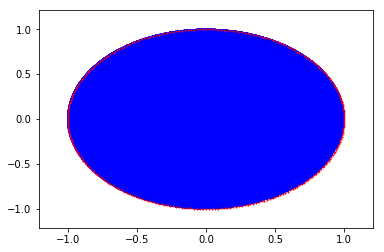

In [105]:
pos = nx.layout.shell_layout(crime_graph)
nx.draw_networkx(crime_graph, pos=pos, node_size=1, with_labels=False, edge_color='blue')
plt.show()

In [125]:
community_assignments = community.best_partition(crime_graph)

In [126]:
communities = np.unique([val for val in labels.values()])

In [150]:
communities

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [64]:
degrees = crime_graph.degree()

In [132]:
def to_count(x, degrees):
    if x in degrees.keys():
        return degrees[x]
    else:
        return 0
def to_community(x, community):
    if x in community.keys():
        return community[x]
    else:
        return -1  
crime_label['degree_in_graph'] = crime_label.crime_code.apply(lambda x: to_count(str(x), degrees))
crime_label['community'] =  crime_label.crime_code.apply(lambda x: to_community(str(x), community_assignments))


In [149]:
crime_label[crime_label.community == 0]

,crime_code,text_description,criminology_category,group_crime,drug_crime,drug_usage,drug_trafficking,degree_in_graph,community
1,1120,MEURTRE DEUXIEME DEGRE,1,0,0,0,0,60,0
2,1130,HOMICIDE INVOL. COUPABLE,1,0,0,0,0,45,0
5,1160,AUTRES INFRACTIONS MORT,1,0,0,0,0,15,0
6,1210,TENTATIVE DE MEURTRE,1,0,0,0,0,140,0
9,1310,AGRESSION SEXUELLE GRAVE,1,0,0,0,0,74,0
10,1320,AGRESSION SEXUELLE ARMEE,1,0,0,0,0,100,0
11,1330,AGRESSION SEXUELLE,1,0,0,0,0,213,0
12,1340,AUTRE INFRACTION SEXUELLE,1,0,0,0,0,150,0
13,1345,CONTACT SEXUEL,1,0,0,0,0,80,0
14,1350,INCITATION CONTACT SEXUEL,1,0,0,0,0,43,0


In [140]:
by_community =crime_label.groupby('community')['text_description']

In [141]:
for community in by_community:
    print(community)

(-1, 3                    INFANTICIDE
8           PROFERER DES MENACES
20                    BESTIALITE
27            VOIE DE FAIT AGENT
29     TRAPPES LESIONS CORPOREL.
31                    ENLEVEMENT
39                  VOL QUALIFIE
40      VOL QUALIFIE ARMES A FEU
41                     EXTORSION
48             INCENDIE CRIMINEL
49       INTRODUCTION EFFRACTION
51        VOL AU-DESSUS + 5000 $
52       VOL EN-DESSOUS - 5000 $
54                        FRAUDE
55                        MEFAIT
56      VOL QUALIFIE (CIE INST.)
57     EXTORSION (CIE INST.FIN.)
58                    BESTIALITE
66     AUTRES INFRAC. JEUX PARIS
68               ARMES PROHIBEES
69         ARMES AUT. RESTREINTE
71          AUTRES ARMES OFFENS.
96     INCITAT. PUBL. A LA HAINE
98       INFRACTION ORDRE PUBLIC
99     ARMES A FEU OU OFFENSIVES
100              MEFAITS PUBLICS
103     MAISON DESORDRE JEU PARI
106      FRAUDE CONTRAT COMMERCE
107     CRUAUTE ENVERS UN ANIMAL
129           HEROINE PRODUCTION
     

In [ ]:
co_offending_table = pd.read_csv('./Cooffending.csv')
co_offending_table.drop_duplicates(inplace=True)
co_offending_table.sort_values(by='NoUnique', inplace=True)
def to_int(x):
    if x == ' ':
        return 0
    else:
        return int(x)
co_offending_table.NCD1 = co_offending_table.NCD1.apply(to_int)
co_offending_table.NCD1 = co_offending_table.NCD1.astype(int)
co_offending_table['ArrestCount'] = co_offending_table.groupby('NoUnique')['SeqE'].transform('count')

In [ ]:
# build mapping of crimes and offender to indicies of a matrix 

offenders = np.unique(co_offending_table[co_offending_table.ArrestCount > 1]['NoUnique'])
crime_types = np.unique(co_offending_table.NCD1)
number_of_offenders = len(offenders)
number_of_crime_types = len(crime_types)

crime_to_index = {}
offender_to_index = {}

for (offender, index) in zip(offenders,range(number_of_offenders)):
    offender_to_index[offender] = index
    
for (crime, index) in zip(crime_types,range(number_of_crime_types)):
    crime_to_index[crime] = index

In [ ]:
X = np.zeros((number_of_crime_types,number_of_offenders))

In [ ]:
for column_index in range(number_of_offenders):
    if column_index % 100000 == 0:
        print(column_index)
    offender = offenders[column_index]
    crimes = co_offending_table[co_offending_table.NoUnique == offender]['NCD1'].values
    for crime in crimes:
        crime_index = crime_to_index[crime]
        X[crime_index, column_index] = 1

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
embedding = TSNE()
X_embedded = embedding.fit_transform(X)

In [ ]:
X_embedded.shape

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

In [ ]:
plt.plot(np.matmul(X, np.ones(X.shape[1])))
plt.show()